In [1]:
%matplotlib inline
from rtxlib.rtx_run import setup_database, db
from analysis_lib.one_sample_tests import KolmogorovSmirnov
from analysis_lib.two_sample_tests import Ttest

index = "rtx10"
# index = "rtx11"

knob = "route_random_sigma"

setup_database(index)
results = db().get_all_data_points()

res = {}
data = {}
knobs = {}

print results[0]
print results[0][1]
print results[0][1][knob]

for i in range(10):
    no = float("0."+str(i))
    res = [r for r in results if r[1].get(knob)==no]
#     res = [r for r in results]
#     res = results
    data[i] = [r[0] for r in res]
    knobs[i] = [r[1] for r in res]
    print "0."+str(i)+"'s: " + str(len(data[i]))

print "end."

> OEDA configuration: Using elasticsearch database.
({u'tick': 7412, u'overhead': 1.8250078202102755}, {u'route_random_sigma': 0.2})
{u'route_random_sigma': 0.2}
0.2
0.0's: 10709
0.1's: 0
0.2's: 11189
0.3's: 0
0.4's: 14269
0.5's: 0
0.6's: 15003
0.7's: 0
0.8's: 0
0.9's: 0
end.


[0.875609089338418, 0.9424711834350387, 0.9461287712208314, 0.9461287712208314, 0.9673362627884645, 0.969245246966034, 0.9722897423432181, 0.9827423625762466, 0.9844464817681124, 0.9873059395621627, 0.9901055246210407, 0.9913917799357174, 0.994995283428899, 0.9957277063159418, 0.9980554445307692, 0.9999175293029233, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.003352887104296, 1.0054450548124796, 1.0061159261742785, 1.006750113447285, 1.0070018124582656, 1.0072811475135697, 1.0072881540302405, 1.007987686844872, 1.0083561628133562, 1.0097603529910044, 1.0104266170906204, 1.0108749896032603, 1.0108840683154265, 1.0122201852311692, 1.0140744464892835, 1.0161982911398093, 1.0164142628470714, 1.0169357162623471, 1.0173152777632948, 1.0176995755740854, 1.0179620646214225, 1.0192913707754918, 1.0193047548744627, 1.0197585877628967, 1.0198141270984122, 1.0198737089431689, 1.0199101923239855, 1.0202019657602481, 1.0206148100982662, 1.0208934349508754, 1.02101500

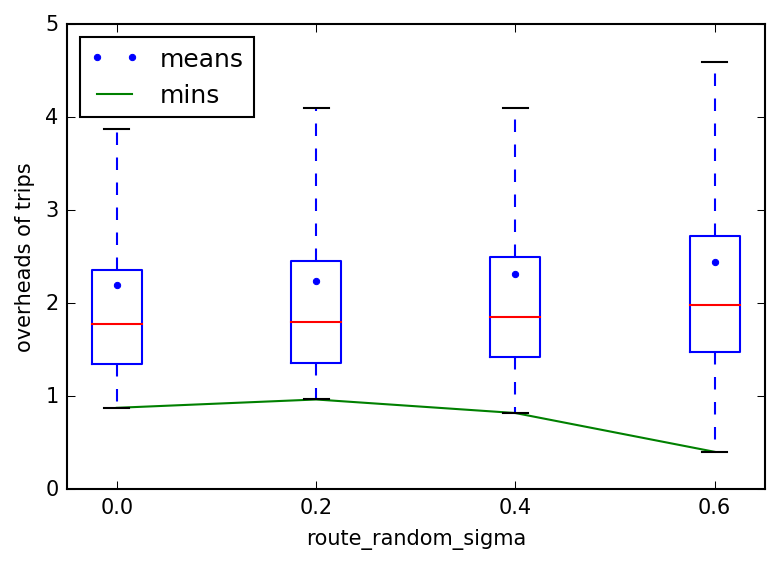

In [32]:
import matplotlib.pyplot as plt
from numpy import var, std, mean, median
import matplotlib as mpl
mpl.rc("savefig", dpi=150)

y_key = 'overhead'

sample_size = 10000
keys = [0, 2, 4, 6]

means = []
mins = []
all_data = []

for i in keys:
    analysis_data = [r[y_key] for r in data[i]][:sample_size]
    all_data.append(analysis_data)
    means.append(mean(analysis_data))
    mins.append(min(analysis_data))
        

print sorted(all_data[0])[:100]
fig,ax = plt.subplots()
ax.plot(keys,means, ".", label='means')
ax.plot(keys,mins, "-", label='mins')
ax.boxplot(all_data, 0, '', positions=keys)
plt.xticks(keys, ["0."+str(k) for k in keys])
plt.legend(loc='best')
plt.ylabel('overheads of trips')
plt.xlabel(knob)
plt.show()

# for i in range(len(all_data)):
#     plt.figure()
#     plt.hist(all_data[i], 100) 
#     plt.ylabel('Overhead count')
#     plt.xlabel('Overhead value')
#     plt.title(knob + " = 0."+str(keys[i]))
#     plt.show()

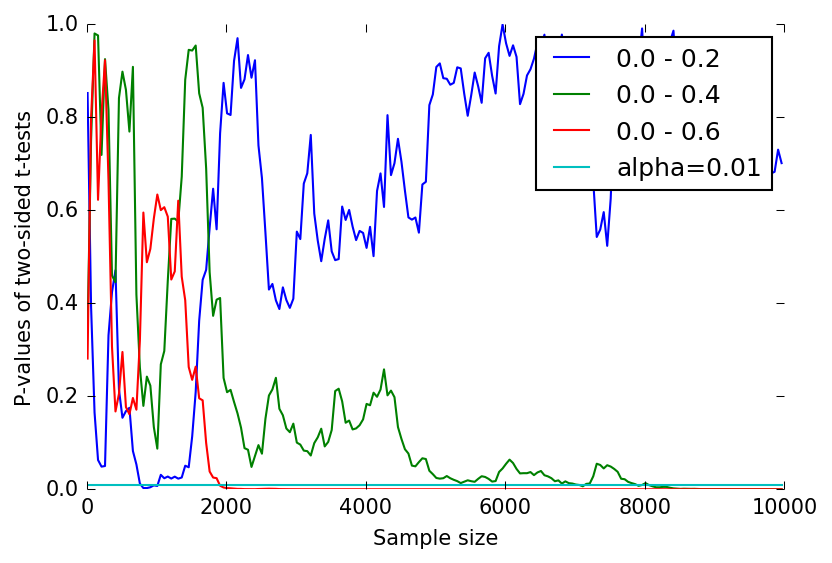

In [30]:
mpl.rc("savefig", dpi=150)

alpha = 0.01

fake_run_id = "123456"
comparison_keys = keys[1:]

sample_sizes = []
pvalues = {}

for i in keys:
    pvalues[i] = []

for sample_size in range(10, 10000, 50):
    sample_sizes.append(sample_size)
    
    analysis_data = {}
    analysis_data[0] = data[0][:sample_size]
    
    for i in comparison_keys:   
        analysis_data[1] = data[i][:sample_size]
        t = Ttest(fake_run_id, y_key, alpha).start(analysis_data, {})
        pvalues[i].append(t["pvalue"])

markers = ['1','2','3','4','s','p','*','h','H']
marker_index = 0

fig,ax = plt.subplots()
for i in comparison_keys:
    ax.plot(sample_sizes,pvalues[i],label='0.0 - 0.'+str(i))
    marker_index += 1
    
ax.plot(sample_sizes,[alpha]*len(sample_sizes), label='alpha='+str(alpha))
ax.set_frame_on(False)
#ax.set_clip_on(False)
#ax.get_xaxis().tick_bottom()
#ax.axes.get_xaxis().set_visible(False)
plt.xlabel('Sample size')
plt.ylabel('P-values of two-sided t-tests')
plt.legend()
plt.show()

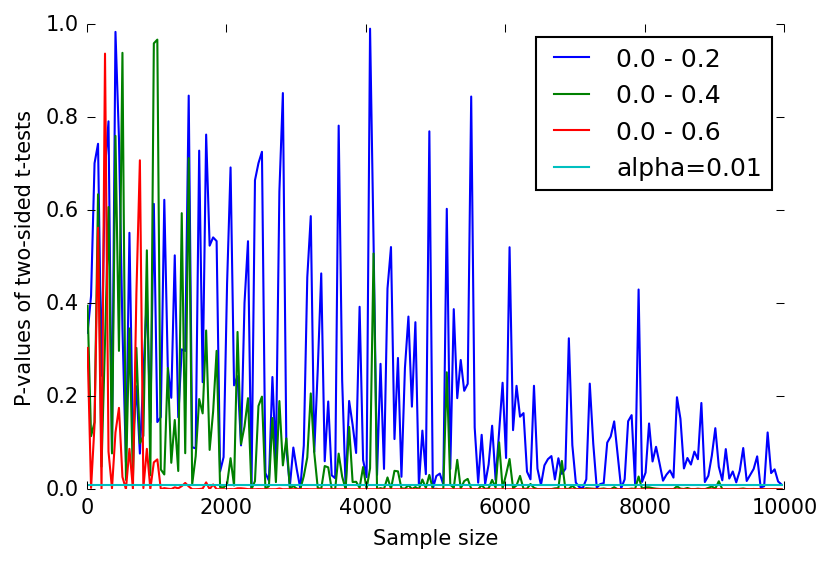

In [11]:
mpl.rc("savefig", dpi=150)
import random

alpha = 0.01

fake_run_id = "123456"
comparison_keys = keys[1:]

sample_sizes = []
pvalues = {}

for i in keys:
    pvalues[i] = []

for sample_size in range(10, 10000, 50):
    sample_sizes.append(sample_size)
    
    analysis_data = {}
    analysis_data[0] = random.sample(data[0], sample_size)
    
    for i in comparison_keys:   
        analysis_data[1] = random.sample(data[i], sample_size)
        t = Ttest(fake_run_id, y_key, alpha).start(analysis_data, {})
        pvalues[i].append(t["pvalue"])

markers = ['1','2','3','4','s','p','*','h','H']
marker_index = 0

fig,ax = plt.subplots()
for i in comparison_keys:
    ax.plot(sample_sizes,pvalues[i],label='0.0 - 0.'+str(i))
    marker_index += 1
    
ax.plot(sample_sizes,[alpha]*len(sample_sizes), label='alpha='+str(alpha))
ax.set_frame_on(False)
plt.legend()
plt.xlabel('Sample size')
plt.ylabel('P-values of two-sided t-tests')
plt.show()

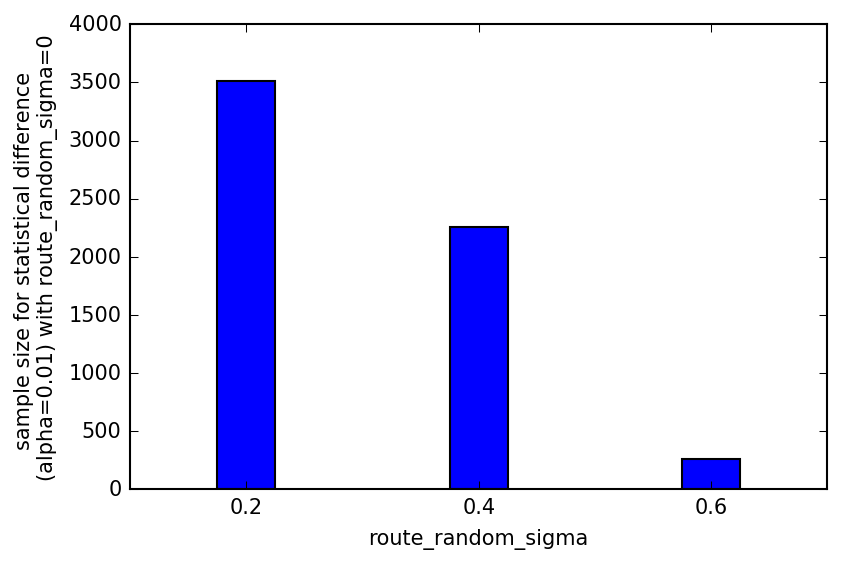

In [13]:
mpl.rc("savefig", dpi=150)
import collections

alpha = 0.01

fake_run_id = "123456"
comparison_keys = keys[1:]

necessary_samples_sizes = collections.OrderedDict()

for i in comparison_keys:   
    for sample_size in range(10, 10000, 50):
    
        analysis_data = {}
        analysis_data[0] = data[0][:sample_size]
        analysis_data[1] = data[i][:sample_size]
#         analysis_data[0] = random.sample(data[0], sample_size)
#         analysis_data[1] = random.sample(data[i], sample_size)
        
        t = Ttest(fake_run_id, y_key, alpha).start(analysis_data, {})
        if t["pvalue"] <= alpha:
            necessary_samples_sizes[i] = sample_size
            break
    if not i in necessary_samples_sizes.keys():
        necessary_samples_sizes[i] = 1000
    
bar_width = 0.05

plt.figure()
plt.bar([float("0."+str(k))-(bar_width/2) for k in necessary_samples_sizes.keys()], 
        necessary_samples_sizes.values(), bar_width)
plt.xlabel(knob)
plt.ylabel('sample size for statistical difference \n(alpha='+str(alpha)+') with ' + knob + '=0')
plt.xticks([float('0.'+str(k)) for k in necessary_samples_sizes.keys()])
plt.show()